In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split



In [2]:
data=pd.read_csv('weight-height.csv')
data.head()




,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
#preprocess
data['Height']=data['Height']*2.54
data['Weight']=data['Weight']/2.205

data=data.replace(['Male','Female'],[1,0])
data

,Gender,Height,Weight
0,1,187.571423,109.702296
1,1,174.706036,73.610192
2,1,188.239668,96.481114
3,1,182.196685,99.792504
4,1,177.499761,93.582676
...,...,...,...
9995,0,168.078536,62.030591
9996,0,170.350573,77.491114
9997,0,162.224700,58.265451
9998,0,175.346978,74.309506


(array([  23.,  218.,  926., 1906., 2196., 2167., 1612.,  765.,  163.,
          24.]),
 array([137.82835865, 144.11120334, 150.39404803, 156.67689272,
        162.95973741, 169.2425821 , 175.52542679, 181.80827149,
        188.09111618, 194.37396087, 200.65680556]),
 <BarContainer object of 10 artists>)

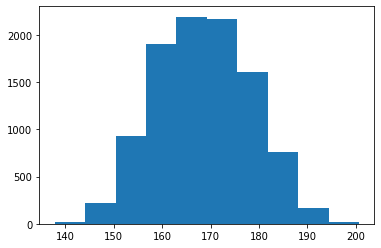

In [4]:

plt.hist(data['Height'])

(array([  15.,  278., 1241., 2175., 1849., 2016., 1747.,  598.,   71.,
          10.]),
 array([ 29.34246109,  38.65264576,  47.96283042,  57.27301508,
         66.58319974,  75.8933844 ,  85.20356906,  94.51375373,
        103.82393839, 113.13412305, 122.44430771]),
 <BarContainer object of 10 artists>)

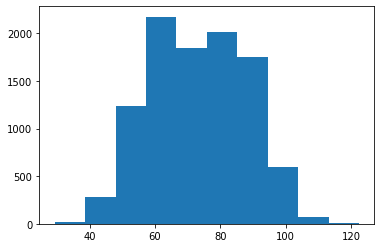

In [5]:
plt.hist(data['Weight'])

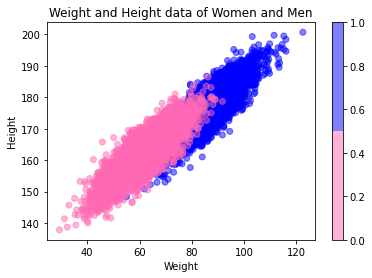

<Figure size 432x288 with 0 Axes>

In [6]:
colors=['hotpink','blue']
plt.scatter(data['Weight'],data['Height'],c=data['Gender'],cmap=ListedColormap(colors),alpha=0.5)
plt.colorbar()
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight and Height data of Women and Men')
plt.show()
plt.savefig('GenderData.png')

In [7]:
X_train=np.array([data['Weight'],data['Height']]).T
X_train.shape



(10000, 2)

In [8]:
Y_train=np.array(data['Gender'])
Y_train.shape

(10000,)

In [9]:
class KNearestNeighbors:
    def __init__(self,k):
        self.k=k
    
    #train
    def fit(self,X_train,Y_train):
        self.X_train=X_train
        self.Y_train=Y_train
     
    def euclidianDistance(self,x_train,X_test):
        distance=np.sqrt(np.sum((x_train-X_test)**2))
        return distance

    def nearNeighbors(self,X_test):
        #nearNeighbors return the k nearest neighbors
        dists=[] 
        for x_train in self.X_train:
            dist=self.euclidianDistance(x_train,X_test)
            dists.append(dist) 

        

        index_sorted=np.argsort(dists)

        #argsort gives the index of the nearest neighbors   
        gender_sorted=self.Y_train[index_sorted]
        return gender_sorted[0:self.k]

       
        

    #test
    def predict(self,X_test):
        nearest_neighbors=self.nearNeighbors(X_test) 
        Y=np.argmax(np.bincount(nearest_neighbors))
        return Y

    def evaluate(self,X_test,Y_test):
        count_correct_pred_item=0
      
        Y_pred=[]

        for x_test in X_test:
            Y_pred.append(self.predict(x_test))

        for i in range(len(X_test)):
            if Y_test[i]==Y_pred[i]:
                count_correct_pred_item+=1

        accuracy=(count_correct_pred_item/len(Y_pred))*100
        return accuracy    

            


In [10]:
knn=KNearestNeighbors(k=5)
knn.fit(X_train,Y_train)

X_test=np.array([50,160])
answer=knn.predict(X_test)
print(answer)



0


In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.01,random_state=42)

In [12]:
#accuracy of implemented knn algorithm
accuracy=knn.evaluate(X_test,Y_test)
print(accuracy)

91.0


In [13]:
#accuracy of knn from scikit-learn library
import sklearn
from sklearn.neighbors import KNeighborsClassifier

correct_label=0

knn=KNeighborsClassifier(5)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
for i in range(len(y_pred)):
    if (y_pred[i]==Y_test[i]):
        correct_label+=1
accuracy=correct_label/len(Y_test)

print(accuracy)




0.91
